**Group Members**:
- Afonso Cadete | 20211519@novaims.unl.pt
- Catarina Oliveira | 20211616@novaims.unl.pt
- Joana Rosa | 20211516@novaims.unl.pt
- Rita Centeno | 20211579@novaims.unl.pt

# 4. Jupyter Notebook - Explore1
## Assessment of Individual Features’ Discrimination

In this fourth Jupyter notebook the main goal is to assess individual feature discrimination. Concluding the initial insights on the respondents to the marketing campaigns and the selection of non-redundant features for the next step.


In the following cell, the needed libraries for this notebook to be correctly run (Pandas and Mode from Statistics) are imported.

In [1]:
# Library Importation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode

## Opening the data

In the next cell, the importation of the dataset with all the previously made transformations is done.

In [2]:
# Importation of the extracted dataset

# This path should be changed into the path where the Excel document was stored.
path = 'C:\\Users\\joana\\Documents\\Joana Rita\\Universidade\\Data Science\\Year 2\\1st Semester\\Programming for Data Science\\1st Project\\'

# Reads the Excel document and defines that the 'ID' column is the index of the dataset
data_original = pd.read_excel(path + "3Extract.xlsx", index_col = 'ID')

# Creates a copy of the imported data, so that the original one is never changed
data=data_original.copy()

# Calls the head of the dataset, to ensure the import was correctly done.
data.head()

,Age,NKids,NTeens,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Education,MaritalStatus,NMinors,FamilySize,MntTotal,%IncomeSpent,TotalPurchases,TotalResponses,NDaysPurchase
ID,,,,,,,,,,,,,,,,,,,,,
5314,65,0,1,40689.0,270,3,27,39,6,99,...,0,Graduation,Together,1,3,345,0.424,13,0,92
2493,50,0,1,61286.0,356,0,107,19,9,117,...,0,Graduation,Married,1,3,491,0.401,16,0,66
4931,39,0,0,157146.0,1,0,1725,2,1,1,...,0,Graduation,Together,0,2,1729,0.550,28,0,41
1100,56,1,2,41275.0,24,4,22,0,2,9,...,0,Master,Together,3,5,52,0.063,7,0,118
7224,39,1,0,31353.0,10,0,10,3,1,7,...,0,Graduation,Married,1,3,24,0.038,4,0,228


## Data Exploration

To simplify the data exploration process, features of the dataset were grouped in batches according to their category (in the cell below).

In [3]:
# socio-demographic features
g_demo = ['Age', 'Education', 'MaritalStatus', 'NKids', 'NTeens', 'Income', 'NMinors', 'FamilySize', '%IncomeSpent']
# frequency features
g_freq = ['Recency', 'NDealsPurchases', 'NWebPurchases', 'NCatalogPurchases', 'NStorePurchases', 'NWebVisitsMonth', 'TotalPurchases', 'NDaysPurchase']
# monetary value features
g_mon_val = ['MntWines', "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "MntTotal"]
# customer lifetime and satisfaction features
g_lifetime_sat = ['Longevity', "Complain"]
# campaigns response features
g_responses = ["Response1", "Response2", "Response3", "Response4", "Response5", 'TotalResponses']
# target feature
g_target = ["Response"]

Some statistics can only be computed with numeric values, consequently numeric variable. Therefore, a new demographic group (`g_demo_num`) was created just for those kind of features.

In [4]:
# numeric socio-demographic features
g_demo_num = ['Age','Income','%IncomeSpent']

For variables `FamilySize`, `NKids` and `NTeens` a different approach was used due to their low number of unique values.

The statistics that will be used to evaluate the different features of the dataset, as well as, the target variable are identified in the following cell.

In [5]:
# defines the target variable of the dataset
by_cols = ['Response']
# defines the statistics that will be used to evaluate the features of the dataset
stats_num = ['mean', 'median', 'std', 'max', 'min','sum']
stats_cat = mode

### Analysis of the statistics of the continuous features of the socio-demographic group

In order to assess relevant differences between customers who responded positively and negatively to the target feature - `Response`, the statistics for the numeric features of the socio-demographic group were computed and presented in a table below.

In [6]:
# aggregates the statistics per numeric socio-demographic feature
aggregation = {f: stats_num for f in g_demo_num}

# groups the columns by the type of response the clients gave
gb_object = data.groupby(by_cols)
data_agg = gb_object.agg(aggregation).round(2)

pd.set_option('display.max_rows', None)
# displays the transposed table
data_agg.T

Response                       0            1
Age          mean          47.37        46.39
             median        46.00        45.00
             std           11.88        12.30
             max          123.00        73.00
             min           20.00        20.00
             sum        81909.00     14242.00
Income       mean       50948.11     60221.35
             median     50150.00     64260.00
             std        25242.19     23228.46
             max       666666.00    105471.00
             min         2447.00      7500.00
             sum     88089278.20  18487954.40
%IncomeSpent mean           0.42         0.66
             median         0.30         0.70
             std            0.91         0.41
             max           35.33         1.55
             min            0.00         0.02
             sum          722.18       201.38

In regard to `Age`, and from the above table, it is possible to conclude that the average age of the contacted customers holds similar values for both positive and negative scenarios. It can also be assessed that the clients who did accept the offers are less than the ones who did actually buy the marketing campaigns. Therefore, it is only natural that the value for the sum statistic when response is equal to zero to be fairly higher than the value for the same statistic when response is 1 (clients who bought the campaign). Another information that can be taken is that the oldest person who did not buy the campaigned products was much older than the oldest person who did accept the offer. Thus, this might not be a useful variable to predict the outcome (`Response`).

For the `Income` variable, the average value of the group of people who did not accept the marketed offer is considerably lower than the value for the other one. As so, `Income` might be a good predictor for the `Response` variable.

As for `%IncomeSpent`, due to it being an extracted feature from `Income`, its values follow the same logic, so the average values of the group which accepted the offer are higher than the one for the other group.

Moreover, all features that were tested on this table have mean values similar to the median ones, which indicates that these variables are not greatly influenced by outliers.

In [7]:
# aggregates the statistics per frequency feature
aggregation = {f: stats_num for f in g_freq}

# groups the columns by the type of response the clients gave
gb_object = data.groupby(by_cols)

data_agg = gb_object.agg(aggregation).round(2)
pd.set_option('display.max_rows', None)

# displays the transposed table
data_agg.T

Response                          0         1
Recency           mean        51.63     35.02
                  median      52.00     29.00
                  std         28.54     27.28
                  max         99.00     99.00
                  min          0.00      0.00
                  sum      89267.00  10750.00
NDealsPurchases   mean         2.32      2.29
                  median       2.00      1.00
                  std          1.84      2.05
                  max         15.00     11.00
                  min          0.00      0.00
                  sum       4012.00    703.00
NWebPurchases     mean         3.90      5.08
                  median       3.00      5.00
                  std          2.66      2.56
                  max         27.00     11.00
                  min          0.00      0.00
                  sum       6745.00   1561.00
NCatalogPurchases mean         2.39      4.19
                  median       1.00      4.00
                  std          2.81      3.12
                  max         28.00     11.00
                  min          0.00      0.00
                  sum       4140.00   1287.00
NStorePurchases   mean         5.75      6.08
                  median       5.00      6.00
                  std          3.24      3.10
                  max         13.00     13.00
                  min          0.00      2.00
                  sum       9943.00   1868.00
NWebVisitsMonth   mean         5.29      5.28
                  median       6.00      6.00
                  std          2.30      2.56
                  max         20.00     10.00
                  min          0.00      1.00
                  sum       9142.00   1622.00
TotalPurchases    mean        12.05     15.36
                  median      11.00     16.00
                  std          7.09      6.83
                  max         32.00     32.00
                  min          1.00      3.00
                  sum      20828.00   4716.00
NDaysPurchase     mean       135.80    103.89
                  median      97.00     73.00
                  std        108.98     76.07
                  max       1419.00    452.00
                  min         28.00     26.00
                  sum     234801.00  31895.00

When it comes to the features: `NDealsPurchases`, `WebPurchases`, `NStorePurchases` and `NWebVisitsMonth`, the average values for both the group of customers who bought and who did not buy the campaign are almost the same.

Nevertheless, even though there is a large difference between the sum statistic values of these two distinct sets of people, the mean values of these variables are still similar; which can indicate that the sum might not be a relevant descriptive statistic for these specific features. As so, these do not seem to be good for making any predictions of the target response feature.

Additionally, the variables `Recency`, `NCatalogPurchases`, `NDaysPurchase` and `Total Purchases` have considerably different values of the average in both groups, which can be a good indicator of a great predictive influence on the outcome variable; since the bigger the difference between the means of the two groups the better. That said, this features appears to be important predictor of the target - `Response`.

In summary, and on the one hand, by looking at the average values of each of the above described variables, it can most likely be deduced that the following aspects have a high influence on the prediction of the outcome variable:
- the number of days between each purchase (the smaller the gap, the better);
- the purchase was made via catalog;
- the total number of purchases (the larger, the better).

On the other hand, the succeeding cases are the ones in which a pattern, for when the marketing campaign was not successful, was identified:
- the customer buys its products online or directly at the store;
- the products were bought on sales or with regular pricing;
- how many visits, per month, does the customer make to the website.

In [8]:
# aggregates the statistics per monetary value feature
aggregation = {f: stats_num for f in g_mon_val}

# groups the columns by the type of response the clients gave
gb_object = data.groupby(by_cols)
data_agg = gb_object.agg(aggregation).round(2)

pd.set_option('display.max_rows', None)
# displays the transposed table
data_agg.T

Response                         0          1
MntWines         mean       271.10     494.19
                 median     156.00     437.00
                 std        306.85     422.82
                 max       1493.00    1492.00
                 min          0.00       1.00
                 sum     468735.00  151716.00
MntFruits        mean        24.33      39.03
                 median       7.00      21.00
                 std         38.23      46.62
                 max        199.00     193.00
                 min          0.00       0.00
                 sum      42063.00   11981.00
MntMeatProducts  mean       145.41     300.51
                 median      57.00     184.00
                 std        207.15     290.84
                 max       1725.00     981.00
                 min          0.00       1.00
                 sum     251409.00   92257.00
MntFishProducts  mean        35.08      51.48
                 median      11.00      25.00
                 std         52.88      61.35
                 max        259.00     250.00
                 min          0.00       0.00
                 sum      60651.00   15803.00
MntSweetProducts mean        25.21      39.48
                 median       7.00      21.00
                 std         40.20      46.94
                 max        262.00     198.00
                 min          0.00       0.00
                 sum      43582.00   12121.00
MntGoldProds     mean        39.80      62.79
                 median      21.00      40.00
                 std         48.33      57.76
                 max        249.00     241.00
                 min          0.00       0.00
                 sum      68806.00   19275.00
MntTotal         mean       501.12     924.68
                 median     276.00     964.00
                 std        529.59     698.01
                 max       2429.00    2491.00
                 min          6.00      14.00
                 sum     866440.00  283878.00

In all monetary features there is a large difference between the mean values when the response is equal to 0 and 1. Nevertheless, for the particular cases of the variables:  `MntWines `,  `MntMeatProducts ` and `MntTotal `  this difference is more noticeable. Therefore, it can be said that all variables related to monetary have the potential to be good predictors of the final campaign  - `Response `.

This analysis suggests that independently of the type of products bought by the customers, the tendency that can be established is "the more bought products, the more likely is the client to buy the campaign".

In [9]:
# aggregates the statistics per customer lifetime and satisfaction features
aggregation = {f: stats_num for f in g_lifetime_sat[0:-1]} # We don't want to analyze the variable complain through this method

# groups the columns by the type of response the clients gave
gb_object = data.groupby(by_cols)
data_agg = gb_object.agg(aggregation).round(2)

pd.set_option('display.max_rows', None)
# displays the transposed table

data_agg.T

Response                   0          1
Longevity mean       1068.68    1173.83
          median     1060.00    1218.00
          std         198.02     200.42
          max        1431.00    1432.00
          min         733.00     739.00
          sum     1847742.00  360367.00

Considering that `Longevity` is a variable which states for how many days the customer has been a client of the company; the above shown table allows for the deductions of the following conclusions:
- there seems to be no considerable difference between the mean values of longevity for both groups of customers (the ones who did buy the final campaign and the ones who did not);
- since the values for the standard deviations of both sets of clients are not extremely large, it can be said that the values of `Longevity` are not really spread apart from each other (low variability of the data).

Finally, there is no great distinction between the oldest and youngest clients of the company (in terms of `Longevity`) regarding who is usually the likeliest to buy the final campaign - `Response`.

### Categorical/Binary Variables GroupBy Analysis

**_How to evaluate the target variable in relation to categorical and binary variables?_**

Instead of using `Response` to aggregate other categorical and binary variables.
Due to the fact that the outcome variable `Response` is a binary feature, it is also possible and much simpler to analyse it by using categorical and binary features to aggregate `Response`. Such a method results in the proportion of customers who bought and who did not buy the final campaign.

#### Customer Household Analysis

In the following cells, groups of categorical variables were created in order to facilitate the aggregation of values in relation to `Response`.

In [10]:
# creation of 4 lists with different grouped or individual variables
columns = ['NKids','NTeens', 'FamilySize', 'NMinors']
columns_1 = ['Complain']
columns_2 = ['Education']
columns_3 = ['MaritalStatus']

Now, the statistics to be used to evaluate the categorical features of the dataset were defines, as well as the aggregation of the stats per category of `Response`.

In [11]:
# definition of the statistic to be used in the variable Response
stats = ['mean', "count"]
aggregation = {'Response' : stats}

Aggregation of the target variable answers by the categorical features of the dataset.

In [12]:
# generates the tables for each variable in columns
for column in columns:
    gb_object = data.groupby(column)
    data_agg = gb_object.agg(aggregation)
    display(data_agg)

Response      
           mean count
NKids                
0      0.176871  1176
1      0.118727   817
2      0.046512    43

Response      
            mean count
NTeens                
0       0.209479  1055
1       0.086724   934
2       0.106383    47

Response      
                mean count
FamilySize                
1           0.412017   233
2           0.157287   693
3           0.099754   812
4           0.074074   270
5           0.035714    28

Response      
             mean count
NMinors                
0        0.276817   578
1        0.100678  1033
2        0.108753   377
3        0.041667    48

From the analysis of the previous tables, it is possible to take the following insight: "the larger the family size is, the smaller is the probability of customer adherence to the target campaign - `Response`". Thus, because on average the mean of the campaign `Response` has a tendency to be closer to 1 when the family size, and consequently `NKids` and `NTeens`, has smaller values.

#### Complains

In [13]:
# generates the tables for the variable in columns_1
for column in columns_1:
    gb_object = data.groupby(column)
    data_agg = gb_object.agg(aggregation)
    display(data_agg)

Response      
              mean count
Complain                
0         0.150794  2016
1         0.150000    20

For the `Complain` feature, since there is not a large representativity of people who complained (only 20 people from the 2036 presented complains), it is not possible to take accurate conclusions from this variable. Therefore, this is most likely not a great predictor of the target variable - `Response`.

#### Education

In [14]:
# generates the tables for the variable in columns_2
for column in columns_2:
    gb_object = data.groupby(column)
    data_agg = gb_object.agg(aggregation)
    display(data_agg)

Response      
                 mean count
Education                  
Basic        0.040816    49
Graduation   0.136364  1034
High School  0.119565   184
Master       0.155689   334
PhD          0.206897   435

By observing the statistics concerning the `Education` variable in relation to the target, it can be assessed that: the higher the education of the customer, the closer the mean is to 1. Which can only mean that customers with a higher education are most likely to positively respond to the final marketing campaign.

#### Marital Status

In [15]:
# generates the tables for the variable in columns_3
for column in columns_3:
    gb_object = data.groupby(column)
    data_agg = gb_object.agg(aggregation)
    display(data_agg)

Response      
                   mean count
MaritalStatus                
Divorced       0.203791   211
Married        0.112801   789
Single         0.228188   447
Together       0.104046   519
Widow          0.271429    70

In concordance to the previously explained methods from the above tables, it is possible to notice that the classes of `MaritalStatus` that present higher values of the mean of the target variable are "Divorced", "Single" and "Widow" (all with values above 0.20). This suggests that people who have a `MaritalStatus` in which they have a higher probability of being single ("Divorced", "Single", "Widow") are the ones which have a greater tendency of buying the last marketing campaign (referent to `Response` target variable).

#### Response

Similar to the analysis of the categorical variables, the values of the mean and count of the `Response` (target feature) were grouped according to the answers given by the specific response campaigns (which are also binary).

In [16]:
# definition of the statistic to be used in the variable Response
stats = ['mean', "count"]
aggregation = {'Response' : stats}

In [17]:
# generates the tables for the variable in g_responses
for column in g_responses:
    gb_object = data.groupby(column)
    data_agg = gb_object.agg(aggregation)
    display(data_agg)

Response      
               mean count
Response1                
0          0.122964  1903
1          0.548872   133

Response      
               mean count
Response2                
0          0.143284  2010
1          0.730769    26

Response      
               mean count
Response3                
0          0.125133  1886
1          0.473333   150

Response      
               mean count
Response4                
0          0.133971  1881
1          0.354839   155

Response      
               mean count
Response5                
0          0.118707  1887
1          0.557047   149

Response      
                    mean count
TotalResponses                
0               0.083903  1609
1               0.308970   301
2               0.500000    76
3               0.800000    40
4               0.900000    10

If it is considered that a representative result in terms of the mean value of the target campaign responses, aggregated by the previous campaign responses, is any value above 0.5, the following conclusions can be discerned.

- People who bought the first campaign (values stored in variable `Response1`) are more likely to buy the target campaign (`Response`).

- Just as for the previous feature, people who bought the second campaign (values stored in variable `Response2`) are also more likely to buy the target campaign (`Response`).

- For the third campaign (values of feature `Response3`), the same conclusion cannot be reached. Since, the value of the mean of `Response` is smaller than 0.5 for both the people who responded positively (0.473333) and negatively (0.124802).

- In `Response4`, a similar situation occurs. None of the values of the mean of `Response` are smaller than 0.5 for both people who bought the forth campaign (0.133616) and those who did not (0.354839).

- Finally, in `Response5`, it is again relevant that the customers who bought the final campaign were the ones which had the most adherence to the fifth campaign (values of `Response5`).

In comparison to previously analysed features, the response variables have great results when it comes to possibly predicting the target variable - `Response`. Nevertheless, it is obvious that `Response2` and `Response5` stand out amongst the others.

Additionally, in `TotalResponses`, it is possible to confirm the tendency that has just been said above - "The more previous campaigns the customers bought, the higher the probability of them buying the target campaign (`Response`)".

The following graphs consist on a more visually appealing way of what was just concluded above.

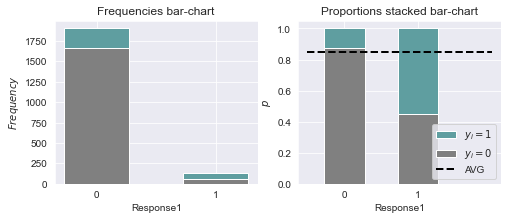

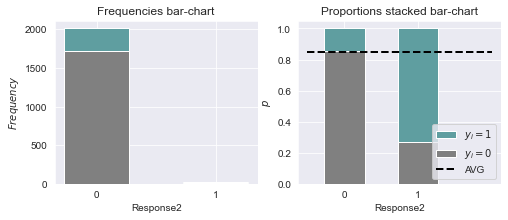

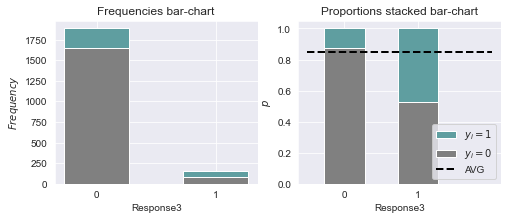

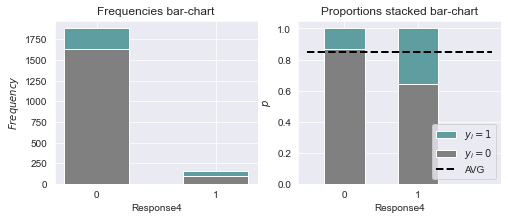

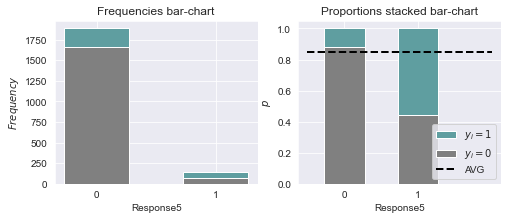

In [18]:
def bin_cat_plot(data, f, target):

    # Creation of Contigency table
    cont_table = pd.crosstab(data[f], data[target], margins = True)
    # Labels of the rows
    l_rows = cont_table.index[:-1].astype(str)
    # Creation of the figures' pair
    fig = plt.figure(figsize=(8, 3))

    # Plot 1)
    plt.subplot(121)
    p1 = plt.bar(l_rows, cont_table.iloc[:-1, 0].values, width=0.55, color="gray")
    p2 = plt.bar(l_rows, cont_table.iloc[:-1, 1].values, width=0.55, bottom=cont_table.iloc[:-1, 0], color="cadetblue")
    plt.title("Frequencies bar-chart")
    plt.xlabel(f)
    plt.ylabel("$Frequency$")

    pct_cnt = np.array([np.divide(cont_table.iloc[:-1, 0].values, cont_table.iloc[:-1, -1].values),
                        np.divide(cont_table.iloc[:-1, 1].values, cont_table.iloc[:-1, -1].values)])
    target_mean = 1 - data[target].mean()

    # Plot 2)
    plt.subplot(122)
    p1 = plt.bar(l_rows, pct_cnt[0], width=0.55, color="gray")
    p2 = plt.bar(l_rows, pct_cnt[1], width=0.55, bottom=pct_cnt[0], color="cadetblue")
    p3 = plt.plot([-.5, len(l_rows)], [target_mean, target_mean],'--', lw=2, color="black")
    plt.legend((p2[0], p1[0], p3[0]), ('$y_i=1$', '$y_i=0$', "AVG"), loc="lower right")
    plt.title("Proportions stacked bar-chart")
    plt.xlabel(f)
    plt.ylabel("$p$")

    plt.show()


# Calls the function on a set of user-specified categorical features
features = ['Response1', 'Response2', 'Response3', 'Response4', 'Response5']
for f in features:
    bin_cat_plot(data, f, "Response")

The first bar chart of each feature shows the difference between the frequencies of previous campaign answers (represented by different bars), related with the answers customers gave on the last campaign (target), which is represented by the colors blue and gray. However, most of the customers, in every campaign, answered 0. Therefore, making the 0 bar considerably larger and the bar representing 1 very hard to analyse.

In the second bar chart, the answers are more proportional which allow for a more readable and fair analysis. Results provided by these graphics go according to the previous analysis. Finally, it is possible to conclude through these graphics that Responses 1, 2 and 5 have a bigger amount of customers who have answered 1 both on these and the target campaign.

## SMD - Scaled Mean Deviation

The Scaled Mean Deviation (SMD) has the goal of comparing the mean of a numerical feature with the mean of a generated group according to one or more categorical features. The result is supposed to measure the worth of a numeric feature, and it is computed through the following formula:

$$\sum_{j=0}^{c}
|SMD_{x, y_{i=j}}| = \sum_{j=0}^{c} |\frac{\overline{x}_{y_{i=j}} - \overline{x}}{\overline{x}}|,$$

where $j$ enumerates categories of feature $y$.

For the study of the Scaled Mean Deviation only the numeric variables were used. This means that every categorical feature (including binary or the ones with a small number of features) were not used.

In [19]:
# ft is the used shortform for features
ft = ['Age', 'Income', 'NDealsPurchases','NWebPurchases','NCatalogPurchases','NStorePurchases','NWebVisitsMonth','TotalPurchases','NDaysPurchase','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds','MntTotal',
      'Longevity', 'Recency']
y = 'Response'

In [20]:
# calculates the mean of the values of each feature in ft
x_mean = data[ft].mean()
x_group_mean = data[ft + [y]].groupby(y).agg({xi: "mean" for xi in ft})

# calculates the scaled mean deviation for every feature in ft
x_group_mean_diff = ((x_group_mean - x_mean)/x_mean)

In [21]:
# calculates the sum of the absolutes of every feature's scaled mean deviation
ft_y_smd = x_group_mean_diff.abs().sum()
ft_y_smd.sort_values(ascending=False)

MntMeatProducts      0.918893
MntTotal             0.749682
MntWines             0.732057
NCatalogPurchases    0.674440
MntFruits            0.553723
MntGoldProds         0.531410
MntSweetProducts     0.521788
MntFishProducts      0.436656
Recency              0.338183
NWebPurchases        0.290127
TotalPurchases       0.264248
NDaysPurchase        0.243599
Income               0.177152
Longevity            0.096961
NStorePurchases      0.057570
Age                  0.020810
NDealsPurchases      0.013176
NWebVisitsMonth      0.000768
dtype: float64

Values of the SMD show that the feature with more "worth" is `MntMeatProducts` followed by the other monetary value features. It is also important to notice the difference of the results between the monetary features and the others (except for `NCatalogPurchases` which is the third feature with more "worth").

The features which had a lower result of SMD were `NStorePurchases` and `Longevity`, meaning that their worth towards the target `Response` is not so favourable (they are not such good predictors of the target variable).

In order to make a decision of which features should be kept to improve the profit of the company, one chose 0.2 as the minimum threshold of worth.

The following cells compute the SMD , grouped by the Response (target), in order to plot it into a barchart, making it visually more appealing.

In [22]:
# calculates the sum of the scaled mean deviation values for every feature relatively to the response values
x_group_mean_diff_T = x_group_mean_diff.T
x_group_mean_diff_T

Response,0,1
Age,0.003138,-0.017672
Income,-0.026712,0.150440
NDealsPurchases,0.001987,-0.011190
NWebPurchases,-0.043747,0.246380
NCatalogPurchases,-0.101696,0.572744
NStorePurchases,-0.008681,0.048889
NWebVisitsMonth,0.000116,-0.000652
TotalPurchases,-0.039845,0.224403
NDaysPurchase,0.036731,-0.206868
MntWines,-0.110384,0.621673


In [23]:
#  Unpivots a DataFrame from wide to long format
dataframe = x_group_mean_diff_T.reset_index().rename(columns = {'index': 'Feature' })
dataframe = pd.melt(dataframe, id_vars = 'Feature', value_vars=[0,1] )
dataframe['abs_value'] = dataframe['value'].abs()
dataframe.sort_values(by = 'abs_value', ascending = False, inplace = True)

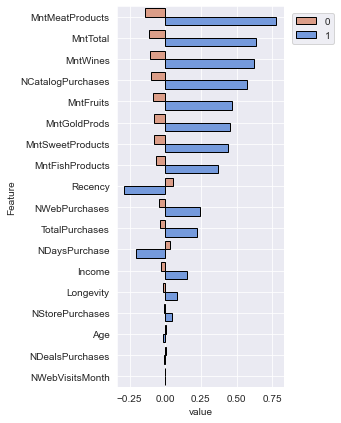

In [24]:
# Barchart SMD graphic
my_palette = ['darksalmon','cornflowerblue']
plt.figure(figsize = (3,7))
g = sns.barplot(data = dataframe, y = 'Feature', x = 'value', linewidth = 1, edgecolor = 'black', hue = 'Response', palette = my_palette)
g.legend(loc = (1.05,0.9))
g.yaxis.grid(True)

The results of the SMD bar chart are according to what was shown before. They indicate that the most worthy feature is `MntMeatProducts`, and the less worthy one is `NWebVisitsMonth`.

To conclude this notebook, the features were organized in the tables below as a way to figure out if they influence more or less the `Response` (target).

 # Categoricals

| Feature | Influence |
|--- | --- |
| MaritalStatus | As 'single' the better |
| Education | As 'higher' the better |
| Responses | All are good with 1, 2 and 5 being the best |

# Numericals

|Features | Analysis of group by Response | Analysis of SMD | Way of Influence |
|--- | --- | --- | --- |
|Income or %IncomeSpent| Keep | Drop | The highest the better |
|Recency | Keep | Keep |The lower the better|
|NCatalogPurchases| Keep | Keep |The highest the better |
|NDaysPurchases | Keep | Keep |  The lower the better |
|TotalPurchases | Keep | Keep | The higher the better |
| Mnt | Keep | Keep | All Mnt features are good, with MntMeatProducts, MntWines and MntTotal being the better |

In the cell below, the variables which were considered as not so relevant features for `Response` were dropped out of the dataset.

In [25]:
# droping the variables with less predictive power
data.drop(['Age', 'NKids', 'NTeens', 'Longevity', 'Complain', 'NDealsPurchases', 'NWebPurchases', 'NStorePurchases', 'NWebVisitsMonth', 'NMinors'], axis = 1,inplace=True)

Data exportation with new alterations to an Excel file.

In [26]:
data.to_excel(path + "4Explore1.xlsx")